## To clustering with Self Organizing Maps on credite card application data using a neural network. Here we use minisom and simpsom.

## In brief, Self-organizing maps are a type of artificial neural network based on competitive learning (at variance to error-correcting learning typical of other NNs). 
## The idea is to iteratively adapt a connected two-dimensional matrix of vectors (or nodes) to the higher-dimensional topology of the input dataset. 
## At each cycle, a node is selected and its elements (the weights) are updated, together with those of its neighbors, to approach a randomly chosen datapoint from the training set. 
## The competitive element comes into play during the update stage, since the closest node (according to a chosen metric) to the extracted datapoint is selected for the weights update at each iteration.

## SOMs are particularly suited for cases where low-dimensional manifolds are hidden in higher dimensions and 
## are often used together and/or competing with other dimensionality reduction methods and in particular Principal Component Analysis (PCA) for which it could be seen as a non-linear generalization: 
## an exhaustive explanation of SOM's advantages and disadvantages, however, is beyond the scope of this notebook, but there are plenty of resources online for those who would like to know more.

In [1]:
!pip install minisom


In [2]:
!pip install simpsom


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from pylab import bone, pcolor, colorbar, plot, show

import simpsom as sps
from minisom import MiniSom

C:\Users\himan\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [4]:
df = pd.read_csv('Credit_Card_Applications.csv')


In [5]:
y = df['Class']
df

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,15808223,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,15769980,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,15675450,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,15776494,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


## The dataset contains transactions made by credit cards. It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features A1, A2, … A14 are the principal components obtained with PCA. It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

In [6]:
y

0      0
1      0
2      0
3      1
4      1
      ..
685    1
686    0
687    1
688    1
689    1
Name: Class, Length: 690, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  690 non-null    int64  
 1   A1          690 non-null    int64  
 2   A2          690 non-null    float64
 3   A3          690 non-null    float64
 4   A4          690 non-null    int64  
 5   A5          690 non-null    int64  
 6   A6          690 non-null    int64  
 7   A7          690 non-null    float64
 8   A8          690 non-null    int64  
 9   A9          690 non-null    int64  
 10  A10         690 non-null    int64  
 11  A11         690 non-null    int64  
 12  A12         690 non-null    int64  
 13  A13         690 non-null    int64  
 14  A14         690 non-null    int64  
 15  Class       690 non-null    int64  
dtypes: float64(3), int64(13)
memory usage: 86.4 KB


In [8]:
df.isnull().sum()

CustomerID    0
A1            0
A2            0
A3            0
A4            0
A5            0
A6            0
A7            0
A8            0
A9            0
A10           0
A11           0
A12           0
A13           0
A14           0
Class         0
dtype: int64

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,690.0,1.569047e+07,71506.473912,15565714.00,1.563169e+07,1.569016e+07,1.575190e+07,15815443.00
A1,690.0,6.782609e-01,0.467482,0.00,0.000000e+00,1.000000e+00,1.000000e+00,1.00
A2,690.0,3.156820e+01,11.853273,13.75,2.267000e+01,2.862500e+01,3.770750e+01,80.25
A3,690.0,4.758725e+00,4.978163,0.00,1.000000e+00,2.750000e+00,7.207500e+00,28.00
A4,690.0,1.766667e+00,0.430063,1.00,2.000000e+00,2.000000e+00,2.000000e+00,3.00
A5,690.0,7.372464e+00,3.683265,1.00,4.000000e+00,8.000000e+00,1.000000e+01,14.00
A6,690.0,4.692754e+00,1.992316,1.00,4.000000e+00,4.000000e+00,5.000000e+00,9.00
A7,690.0,2.223406e+00,3.346513,0.00,1.650000e-01,1.000000e+00,2.625000e+00,28.50
A8,690.0,5.231884e-01,0.499824,0.00,0.000000e+00,1.000000e+00,1.000000e+00,1.00
A9,690.0,4.275362e-01,0.495080,0.00,0.000000e+00,0.000000e+00,1.000000e+00,1.00


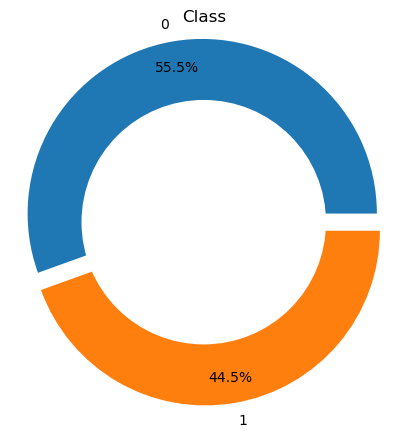

In [10]:
fig1, ax1 = plt.subplots(figsize=(5,5))

index = df['Class'].value_counts().index
size = df['Class'].value_counts().values
explode = (0.05, 0.05)

plt.pie(size, labels=index, 
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode)

# Inner circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  
plt.title("Class")
plt.show()

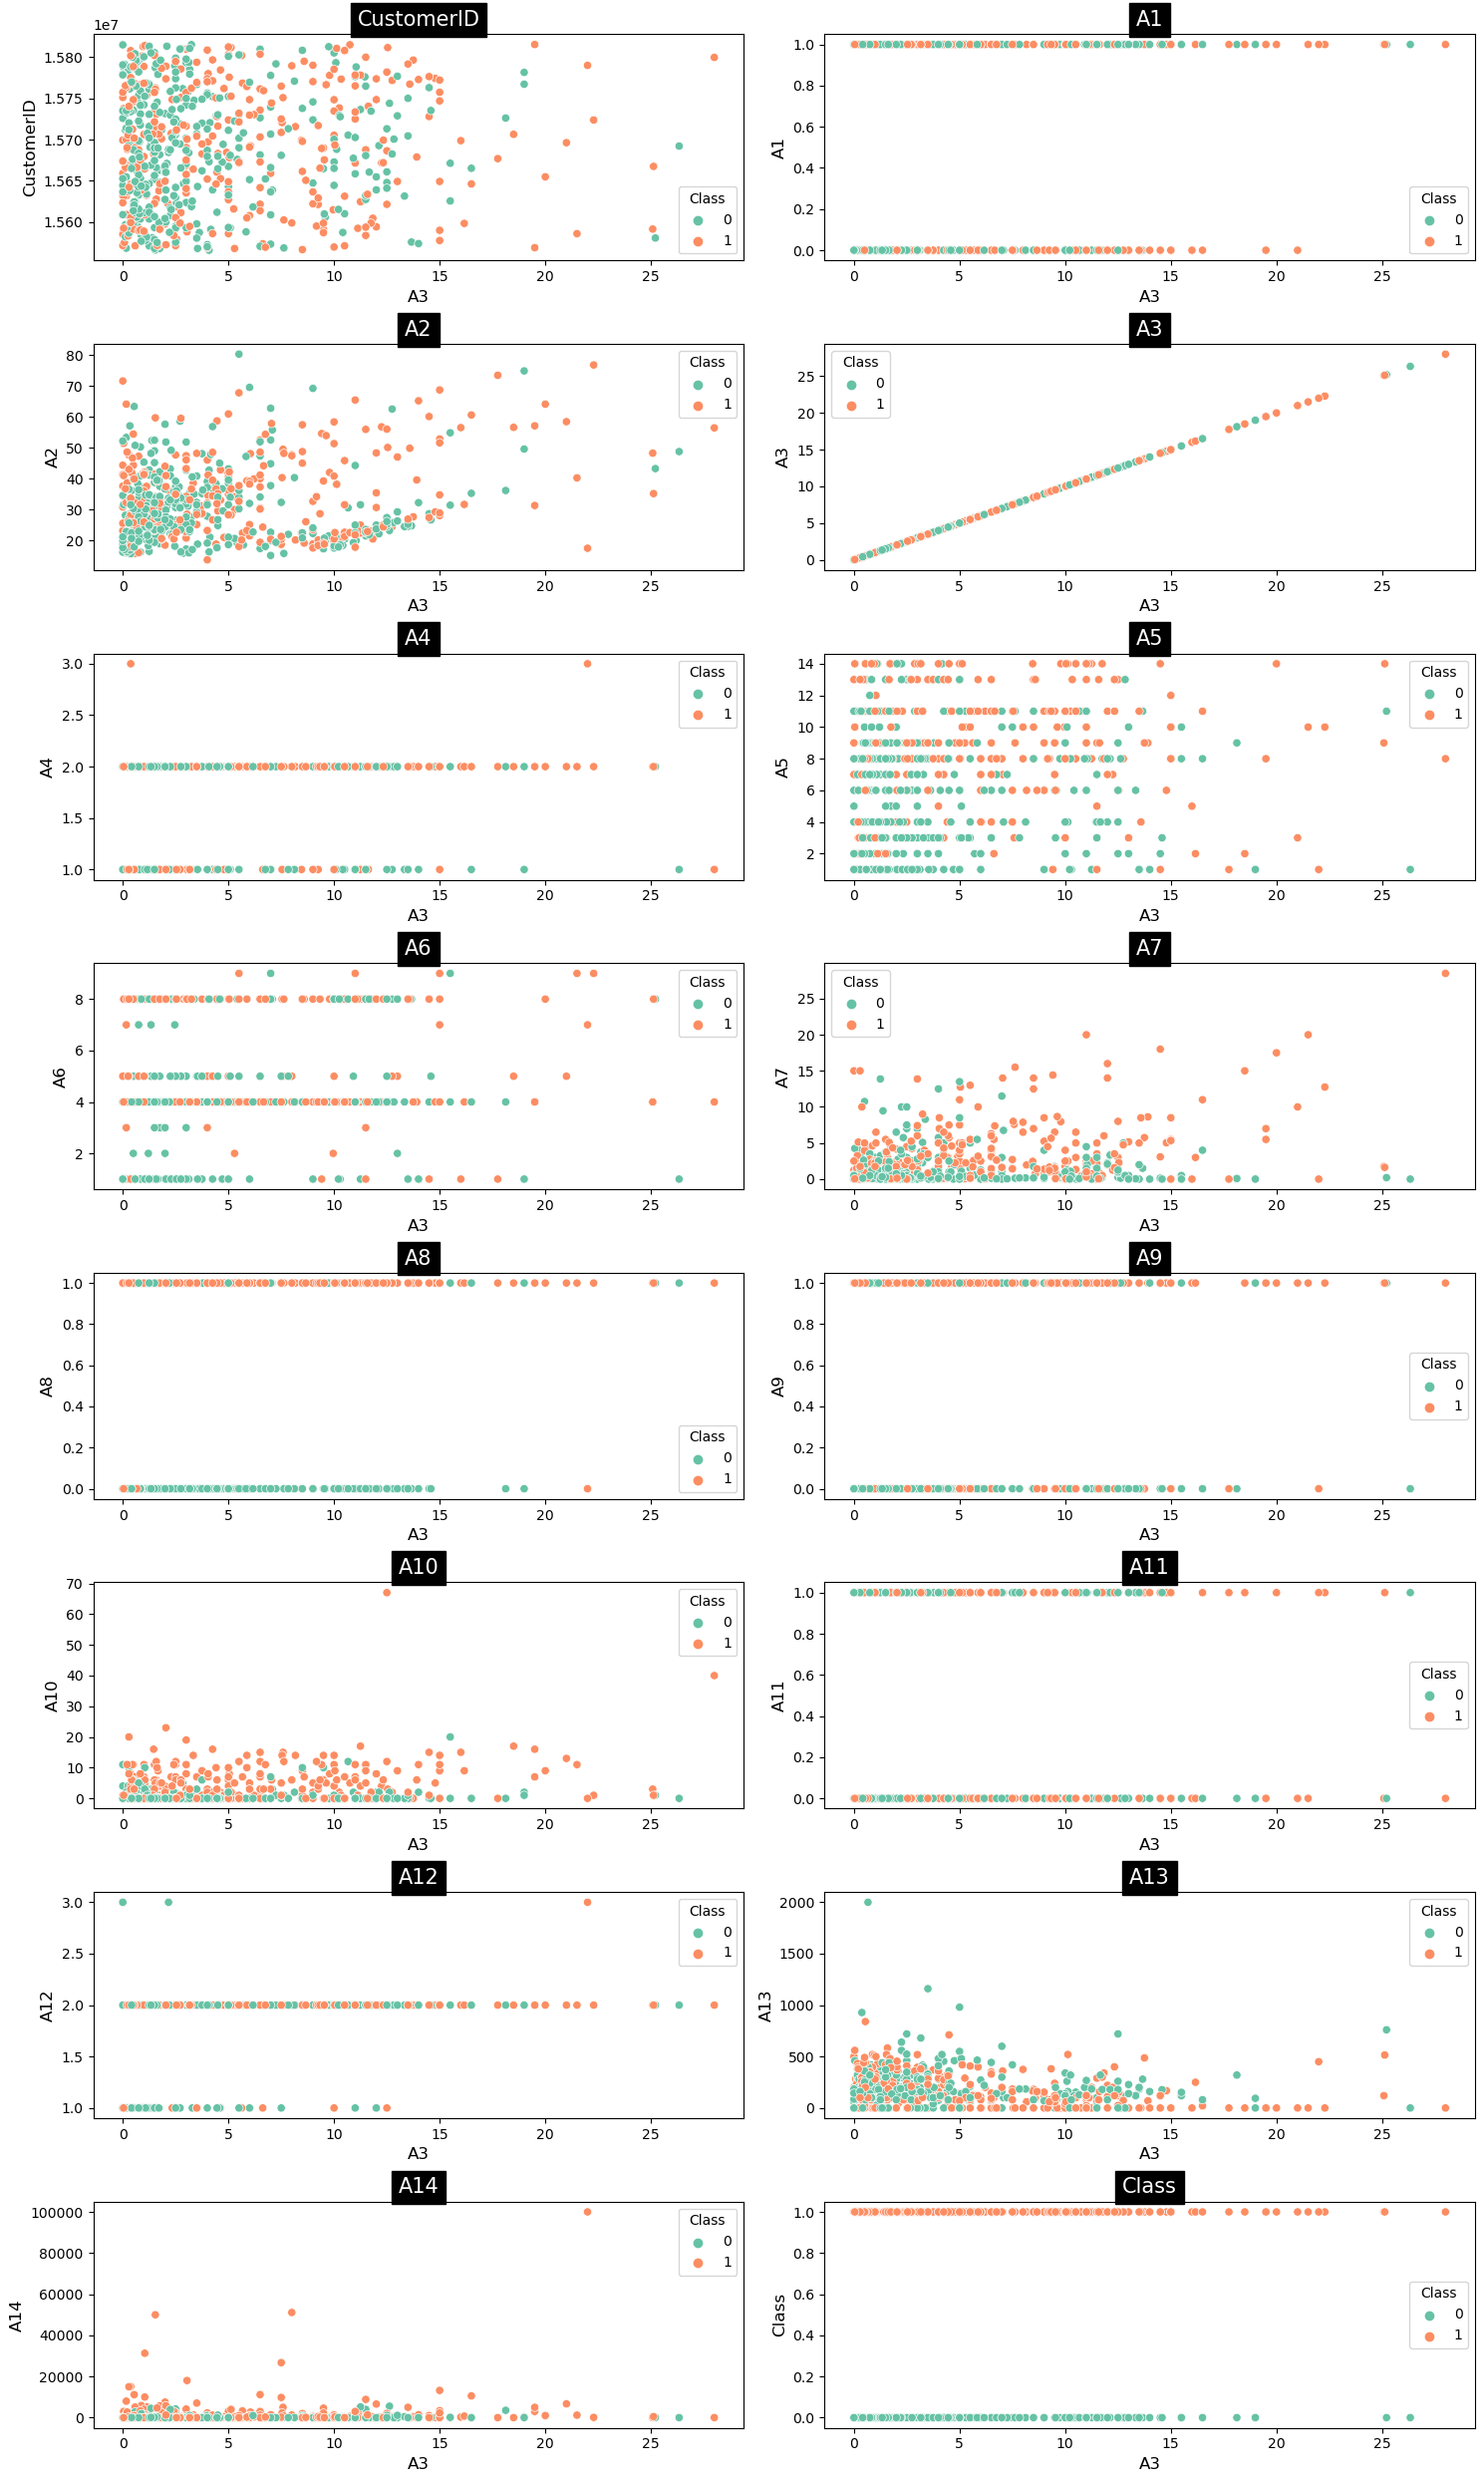

In [11]:
sns.set_palette("Set2")
plt.figure(figsize = (15,25))
for idx, i in enumerate(df):
    plt.subplot(8, 2, idx + 1)
    sns.scatterplot(x =df['A3'], y=df[i], hue=df['Class'] , data = df)
    plt.title(i,backgroundcolor='black',color='white',fontsize=15)
    plt.xlabel('A3' , size = 12)
    plt.ylabel(i , size = 12)
plt.tight_layout()                     
plt.show()

In [12]:
df.drop("Class", axis = 1, inplace = True)


In [13]:
df

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,15808223,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1
686,15769980,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45
687,15675450,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1
688,15776494,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12


In [14]:
scaler = MinMaxScaler(feature_range = (0,1))
df1 = scaler.fit_transform(df)
df1

array([[8.42681467e-01, 1.00000000e+00, 1.25263158e-01, ...,
        5.00000000e-01, 5.00000000e-02, 1.21200000e-02],
       [6.96090562e-01, 0.00000000e+00, 1.34135338e-01, ...,
        5.00000000e-01, 8.00000000e-02, 0.00000000e+00],
       [3.88981656e-01, 0.00000000e+00, 2.38045113e-01, ...,
        5.00000000e-01, 1.40000000e-01, 0.00000000e+00],
       ...,
       [4.39420332e-01, 0.00000000e+00, 7.63909774e-02, ...,
        5.00000000e-01, 5.00000000e-02, 0.00000000e+00],
       [8.44034934e-01, 0.00000000e+00, 2.05563910e-01, ...,
        5.00000000e-01, 6.00000000e-02, 1.10000000e-04],
       [1.06907888e-01, 1.00000000e+00, 4.09774436e-01, ...,
        0.00000000e+00, 2.80000000e-01, 0.00000000e+00]])

# What are SimpSOM?
## SimpSOM is a lightweight implementation of Kohonen Self-Organizing Maps(SOM) for Python 3, useful for unsupervised learning,clustering and dimensionality reduction.

## It allows you to build and train SOM on your dataset, save/load the trained network weights, and display or print graphs of the network with selected features.

In [15]:
#We build a 30x30 network and initialise its weights with PCA 
#net = sps.SOMNet(30, 30, df1, PBC=True)
net = sps.SOMNet(30, 30, df1,  
                init='PCA', metric='cosine', PBC=True,
                random_seed=32, GPU=False)

#Now we can train it with 0.1 learning rate for 1000 epochs
#net.train(0.1, 1000)
net.train(train_algo='batch', start_learning_rate=0.1, epochs=1000, 
    batch_size=-1)

Periodic Boundary Conditions active.
The weights will be initialized with PCA.
The map will be trained with the batch algorithm.
Training SOM... done!


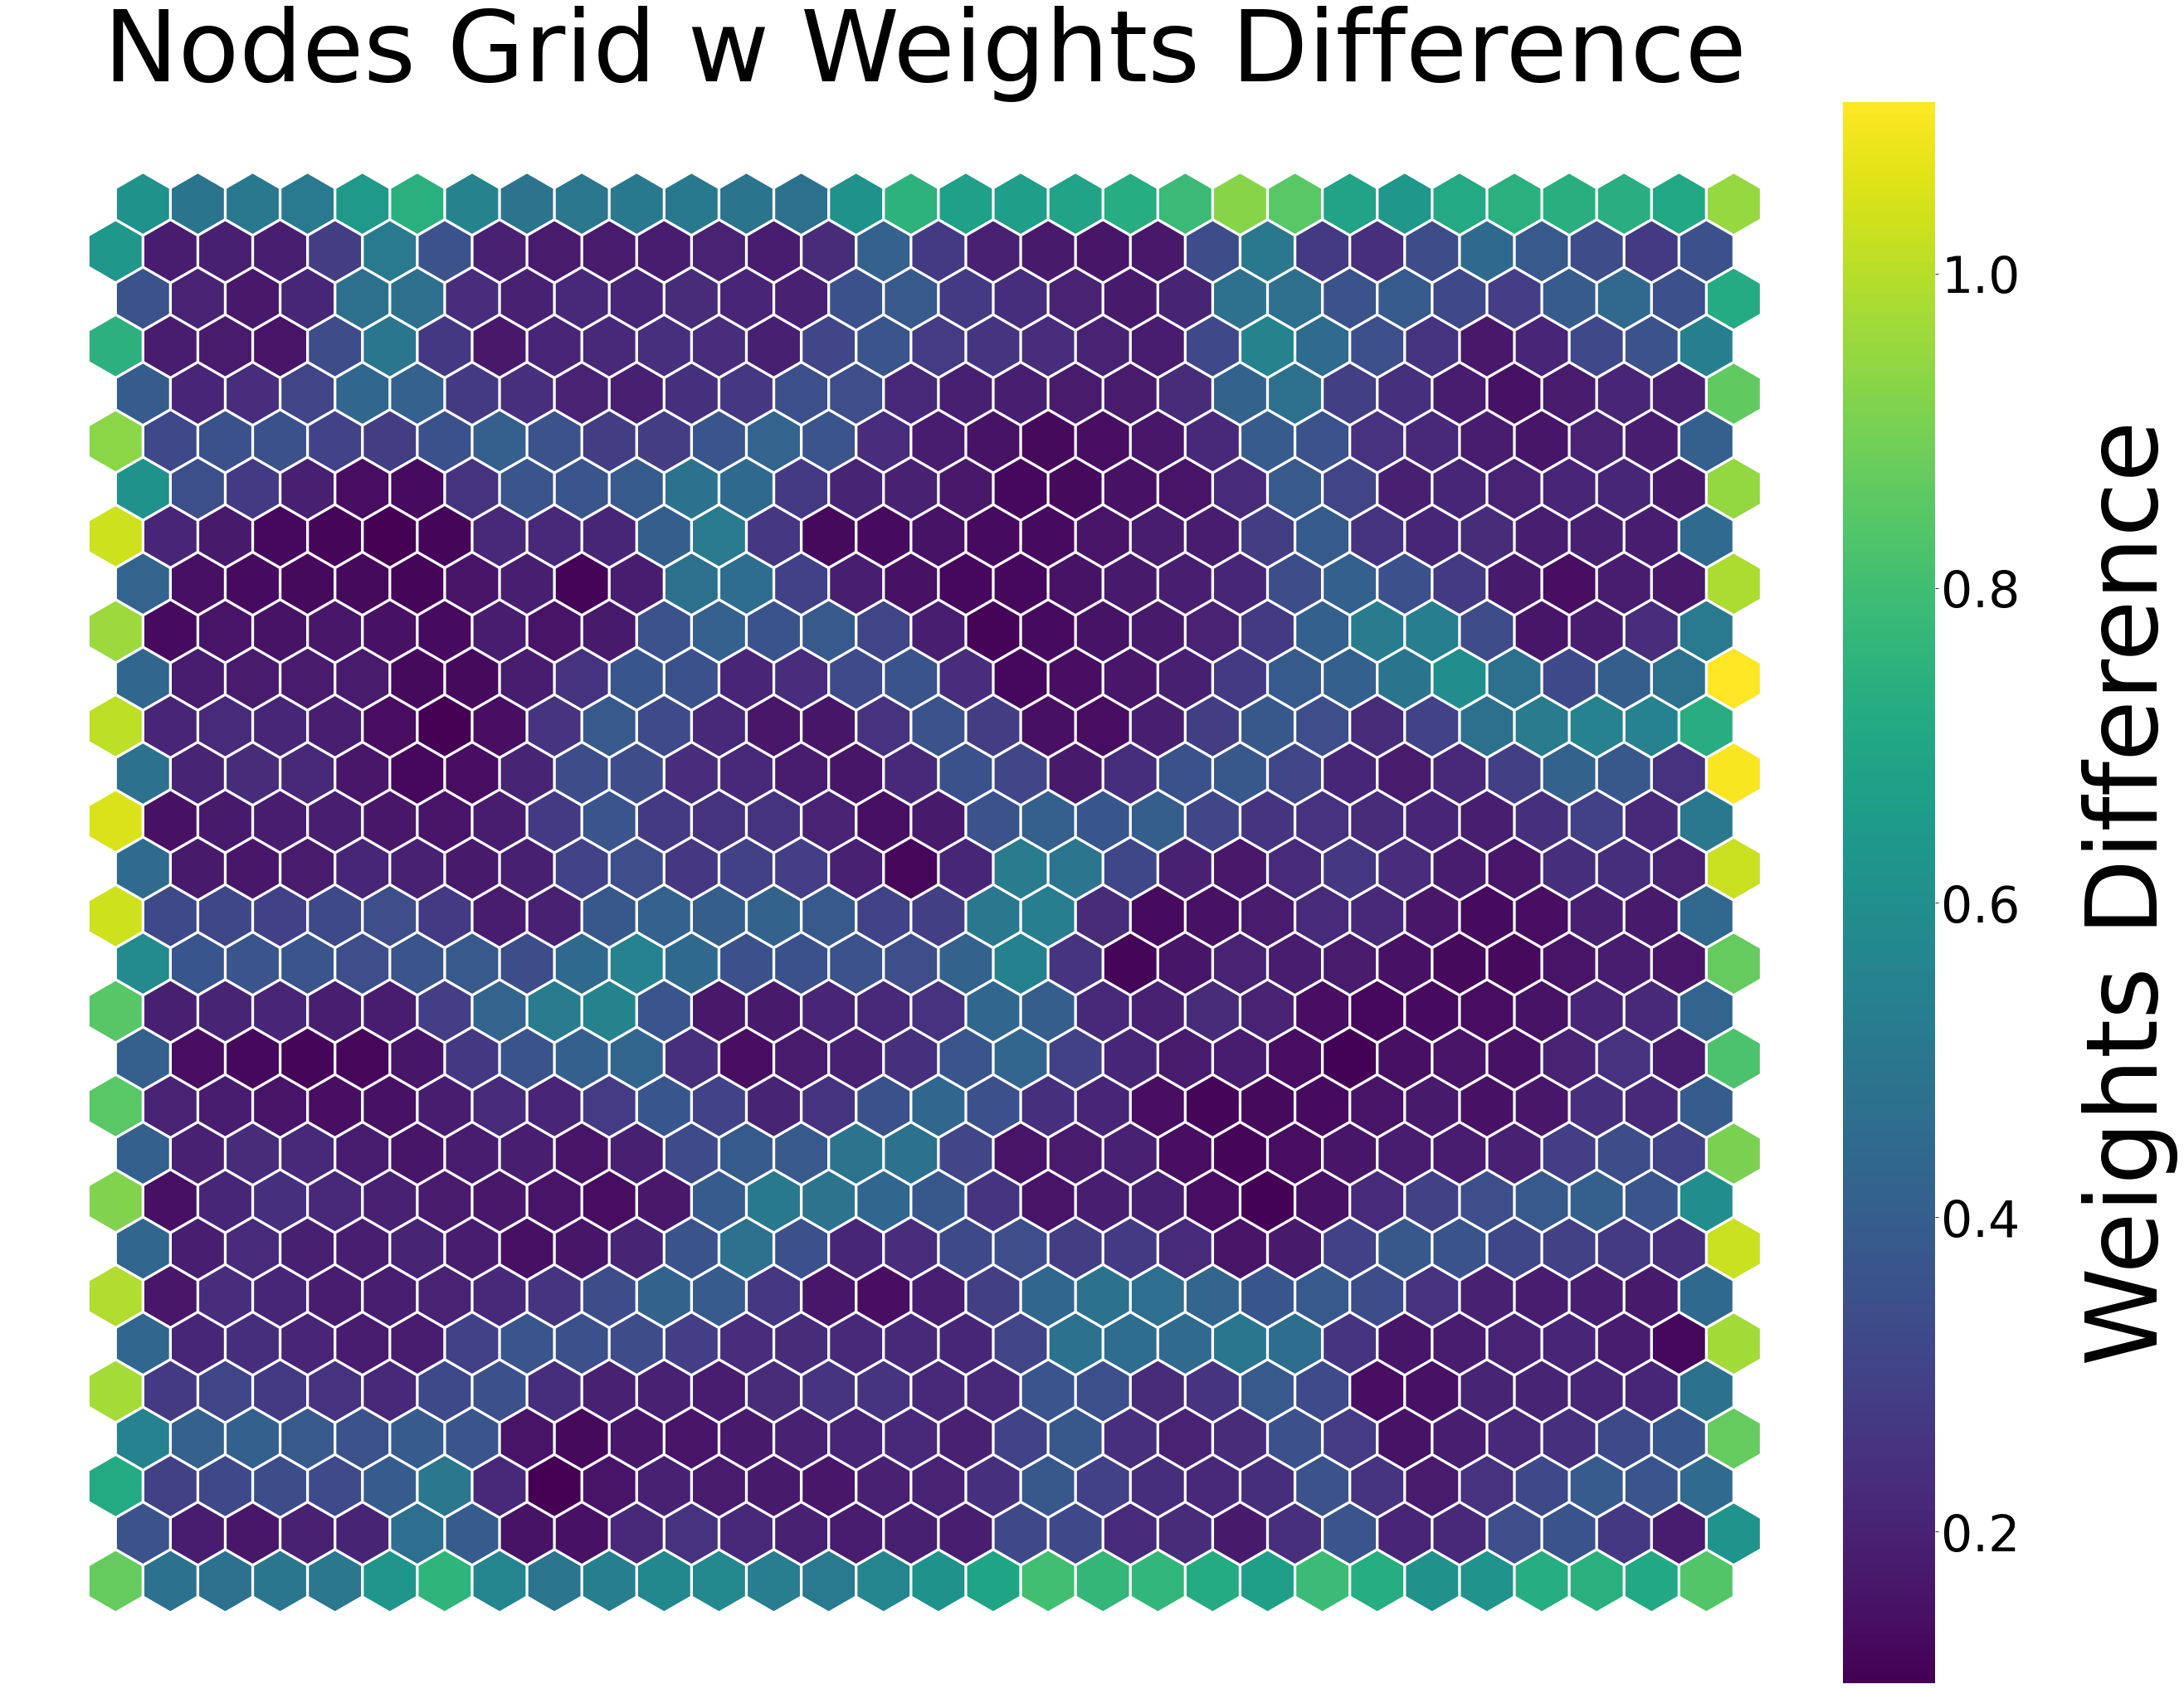

<Figure size 640x480 with 0 Axes>

In [16]:
#We print to screen the map of the weights differences between nodes, this will help us identify cluster centers 

net.diff_graph(show=True)

# What are MiniSom?
## MiniSom is a minimalistic and Numpy based implementation of the Self Organizing Maps (SOM). 
## SOM is a type of Artificial Neural Network able to convert complex, nonlinear statistical relationships between high-dimensional data items into simple geometric relationships on a low-dimensional display.

In [17]:
# Training the SOM

Som = MiniSom(x = 15, y = 15, input_len = 15, sigma = 1.0, learning_rate = 0.5)
Som.random_weights_init(df1)
Som.train_random(data = df1, num_iteration = 1000)

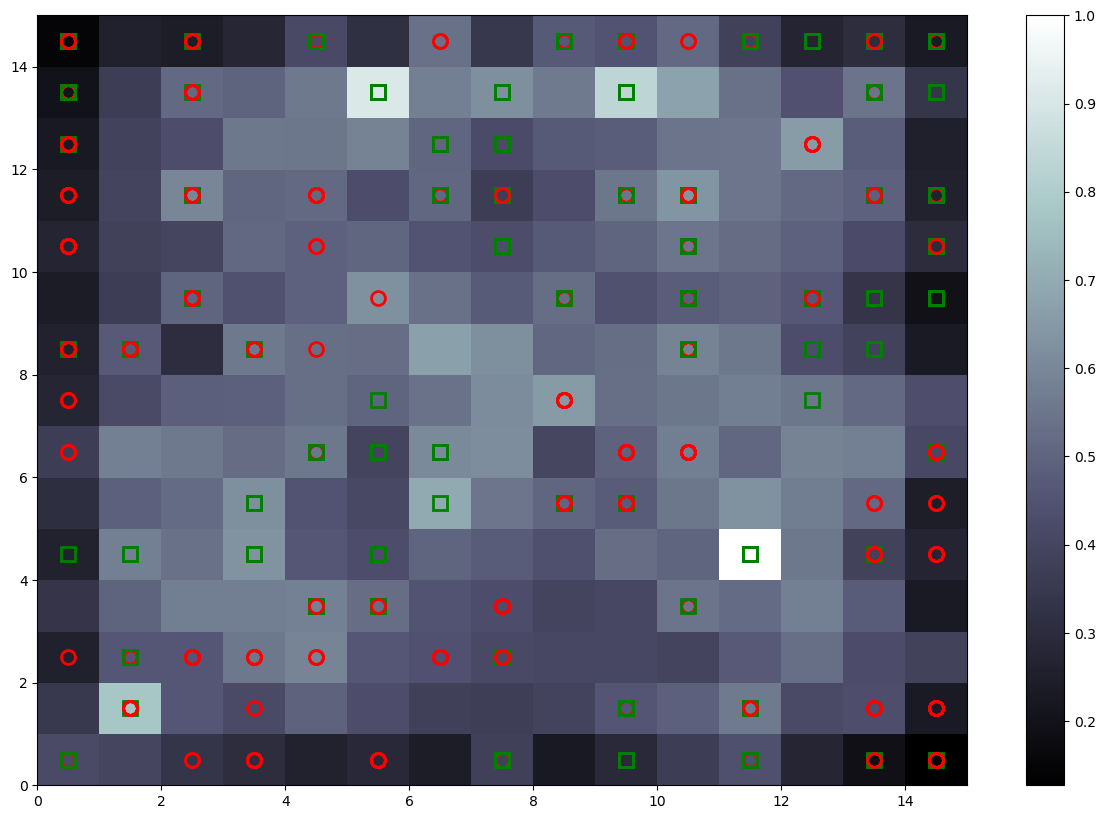

In [18]:
# Visualizing the results

plt.figure(figsize = (15,10))
bone()
pcolor(Som.distance_map().T)
colorbar()
# check if customers got approval or not, green - yes, red - no
markers = ['o','s'] # o/circle for red - no approval, s/square for green - approval
colors = ['r','g']
for i,x in enumerate(df1): # i becomes index, and x is a vector containing other attributes
    w = Som.winner(x)
    plot(w[0] + 0.5, w[1] + 0.5, markers[y[i]], markeredgecolor = colors[y[i]], markerfacecolor = 'None'
        , markersize = 10, markeredgewidth = 2)


# How to interpret and evaluate a Self Organizing Map?
1. A Self Organizing Map creates a view that represents high dimensional data as low dimensional data preserving topological properties of the input space using a neighborhood function.

2. The heatmap in the background on which the clusters reside represent the topological properties of the input space. The colorbar() on the right represent the topological distance. The distance goes from 0(black) to 1(white) where lesser the distance, more is the correlation/similarity of the feature with its immediate neighboring features.

3. If the feature is white i.e., topological distance close to 1, then they can be classified as anomalies. The markers(colored shapes) represent different labels and are clustered on the topological space on the basis of their topological properties.

4. Our goal is to have distinct clusters but that doesn't mean all the points of the cluster have to be close to each other because this is non-linear dimensionality reduction and not K-means clustering where points are located close to the centroids.

5. For better evaluation, we have to take care that any given feature should be occupied by only one label/marker. We should optimize the map for the same.

6. Overlap of mutiple labels on a feature means its uniqueness is compromised and there is a scope of improvement.

Note: SOM might produce a different map in the next run. So there is a possibility that after my final submission, you might get to see the white square in a different position altogether.

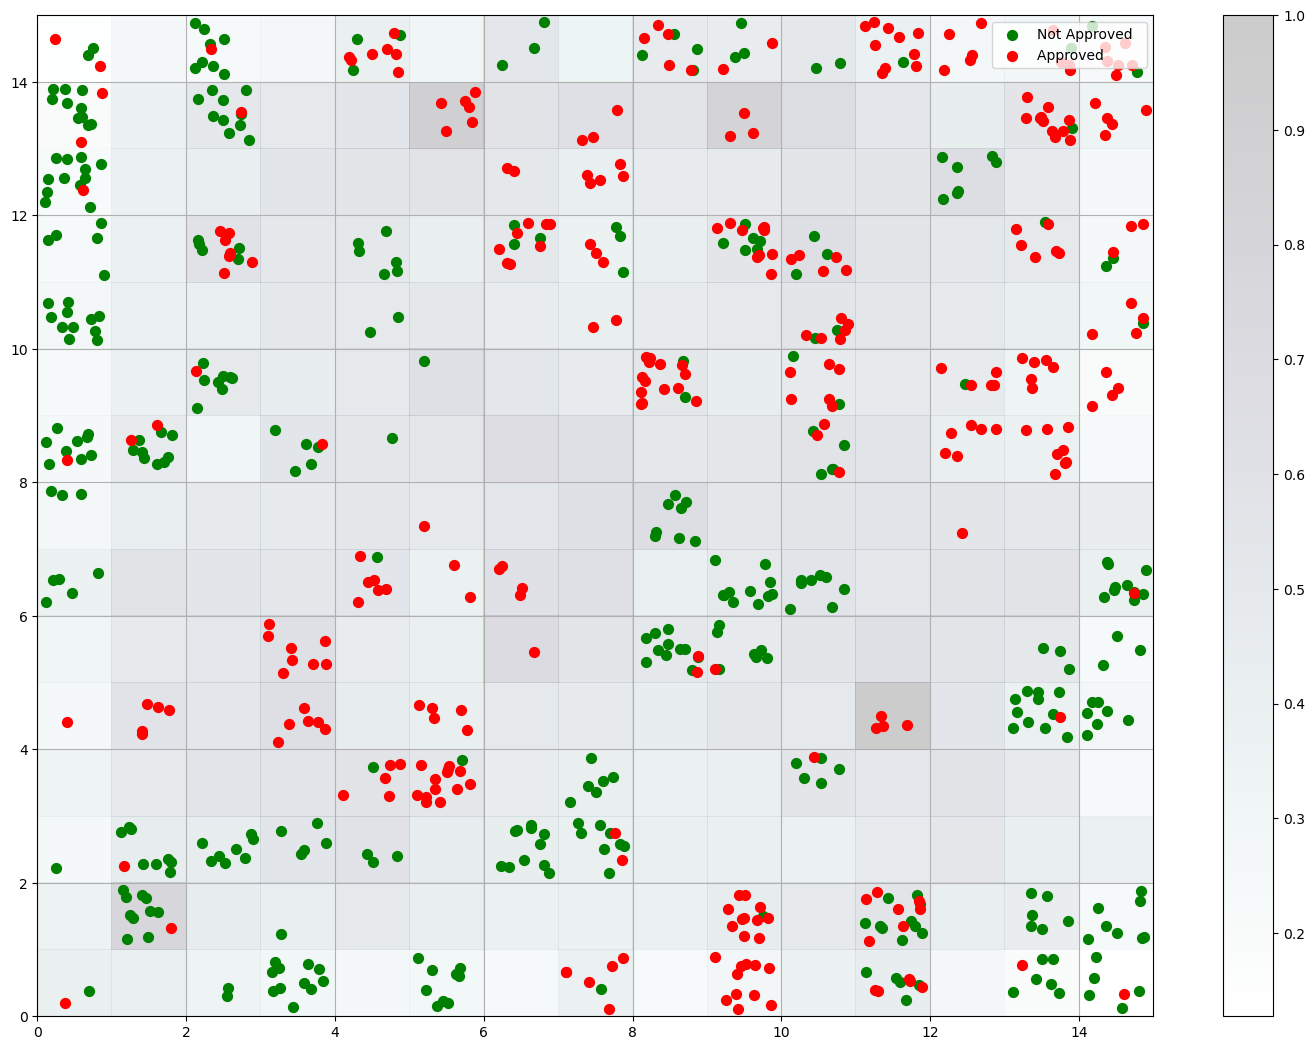

In [19]:
w_x, w_y = zip(*[Som.winner(d) for d in df1])
w_x = np.array(w_x)
w_y = np.array(w_y)
label_names = {0:'Not Approved  ', 1:'Approved '}

plt.figure(figsize=(18, 13))
plt.pcolor(Som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

for c in np.unique(y):
    idx_target = y==c
    plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8, 
                s=50, c=colors[c-1], label=label_names[c])
plt.legend(loc='upper right')
plt.grid()
plt.show()

In [20]:
mapping = Som.win_map(df1)

frauds = []
frauds.extend(mapping[(4, 3)])
frauds.extend(mapping[(6, 10)])
frauds.extend(mapping[(13, 8)])

# Convert the result to a NumPy array if needed
frauds = np.array(frauds)

In [21]:
# Inverse scaling
frauds1 = scaler.inverse_transform(frauds)

In [22]:
frauds1

array([[1.5789201e+07, 1.0000000e+00, 1.8500000e+01, 2.0000000e+00,
        2.0000000e+00, 3.0000000e+00, 4.0000000e+00, 1.5000000e+00,
        1.0000000e+00, 1.0000000e+00, 2.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 1.2000000e+02, 3.0100000e+02],
       [1.5735837e+07, 1.0000000e+00, 5.2500000e+01, 6.5000000e+00,
        2.0000000e+00, 4.0000000e+00, 4.0000000e+00, 6.2900000e+00,
        1.0000000e+00, 1.0000000e+00, 1.5000000e+01, 0.0000000e+00,
        2.0000000e+00, 0.0000000e+00, 1.1203000e+04],
       [1.5704315e+07, 1.0000000e+00, 3.4420000e+01, 4.2500000e+00,
        2.0000000e+00, 3.0000000e+00, 5.0000000e+00, 3.2500000e+00,
        1.0000000e+00, 1.0000000e+00, 2.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 2.7400000e+02, 6.1100000e+02],
       [1.5800049e+07, 1.0000000e+00, 2.3080000e+01, 1.1500000e+01,
        2.0000000e+00, 3.0000000e+00, 4.0000000e+00, 3.5000000e+00,
        1.0000000e+00, 1.0000000e+00, 9.0000000e+00, 0.0000000e+00,
        2.0000000e+00,

In [23]:
fraud_data = pd.DataFrame(frauds1)
fraud_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,15789201.0,1.0,18.50,2.000,2.0,3.0,4.0,1.500,1.0,1.0,2.0,0.0,2.0,120.0,301.0
1,15735837.0,1.0,52.50,6.500,2.0,4.0,4.0,6.290,1.0,1.0,15.0,0.0,2.0,0.0,11203.0
2,15704315.0,1.0,34.42,4.250,2.0,3.0,5.0,3.250,1.0,1.0,2.0,0.0,2.0,274.0,611.0
3,15800049.0,1.0,23.08,11.500,2.0,3.0,4.0,3.500,1.0,1.0,9.0,0.0,2.0,56.0,743.0
4,15785367.0,1.0,51.33,10.000,2.0,3.0,5.0,0.000,1.0,1.0,11.0,0.0,2.0,0.0,1250.0
5,15781574.0,1.0,49.58,19.000,2.0,1.0,1.0,0.000,1.0,1.0,1.0,0.0,2.0,94.0,1.0
6,15683168.0,1.0,29.58,4.500,2.0,9.0,4.0,7.500,1.0,1.0,2.0,1.0,2.0,330.0,1.0
7,15682860.0,1.0,27.83,1.500,2.0,9.0,4.0,2.000,1.0,1.0,11.0,1.0,2.0,434.0,36.0
8,15764226.0,1.0,25.75,0.500,2.0,8.0,4.0,1.460,1.0,1.0,5.0,1.0,2.0,312.0,1.0
9,15690492.0,1.0,25.33,0.580,2.0,8.0,4.0,0.290,1.0,1.0,7.0,1.0,2.0,96.0,5125.0
